In [2]:
import numpy as np


### in np

In [13]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)


[1 0 3 2 4]


In [14]:
x = np.array([3, 1, 4, 2, 5])
i = np.argsort(x)
print(i)


[1 3 0 2 4]


In [15]:
x[i]

array([1, 2, 3, 4, 5])

In [16]:
# by row or by column
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [17]:
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [18]:
np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### partitioning

In [19]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [20]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [21]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

### knn

In [9]:
import numpy.random as rand
X = rand.rand(10, 2)
X

array([[0.22776858, 0.80559328],
       [0.11054171, 0.84514996],
       [0.71653227, 0.45406543],
       [0.85631699, 0.17878876],
       [0.4414676 , 0.03883922],
       [0.25217101, 0.11887188],
       [0.08692117, 0.25640655],
       [0.10553426, 0.55279227],
       [0.45018275, 0.31995737],
       [0.22526588, 0.13806257]])

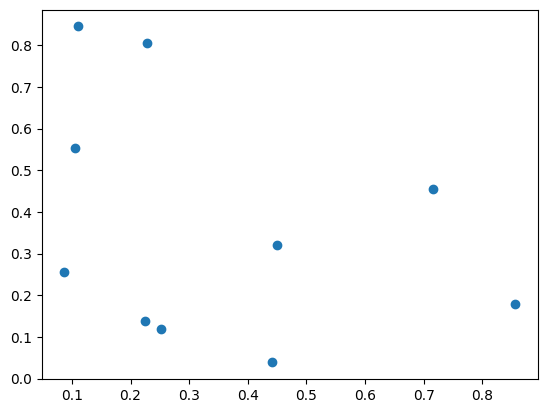

In [11]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1])

In [12]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)
dist_sq

array([[0.        , 0.01530687, 0.36246177, 0.78795701, 0.63357906,
        0.47218175, 0.32144406, 0.07884958, 0.28531029, 0.44560351],
       [0.01530687, 0.        , 0.52017167, 1.00021802, 0.75964896,
        0.5475387 , 0.34717673, 0.08549809, 0.39118329, 0.51313421],
       [0.36246177, 0.52017167, 0.        , 0.09531701, 0.24807338,
        0.32798609, 0.43547917, 0.38306557, 0.08892704, 0.34120048],
       [0.78795701, 1.00021802, 0.09531701, 0.        , 0.19168589,
        0.36858239, 0.59799445, 0.70355334, 0.1848736 , 0.39988413],
       [0.63357906, 0.75964896, 0.24807338, 0.19168589, 0.        ,
        0.04223842, 0.17303871, 0.37699895, 0.07910337, 0.05658846],
       [0.47218175, 0.5475387 , 0.32798609, 0.36858239, 0.04223842,
        0.        , 0.04622329, 0.20978924, 0.07964402, 0.00109217],
       [0.32144406, 0.34717673, 0.43547917, 0.59799445, 0.17303871,
        0.04622329, 0.        , 0.08819094, 0.13599768, 0.03314455],
       [0.07884958, 0.08549809, 0.3830655

In [18]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
print(differences.shape)
differences[0,0:3,:]

(10, 10, 2)


array([[ 0.        ,  0.        ],
       [ 0.11722687, -0.03955668],
       [-0.48876369,  0.35152785]])

In [22]:
# square the coordinate differences
sq_differences = differences ** 2
print(sq_differences.shape)
sq_differences[0,0:3,:]

(10, 10, 2)


array([[0.        , 0.        ],
       [0.01374214, 0.00156473],
       [0.23888995, 0.12357183]])

In [21]:
ist_sq = sq_differences.sum(-1)
print(dist_sq.shape)
dist_sq[0:3,0:3]

(10, 10)


array([[0.        , 0.01530687, 0.36246177],
       [0.01530687, 0.        , 0.52017167],
       [0.36246177, 0.52017167, 0.        ]])

In [23]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)


[[0 1 7 8 6 2 9 5 4 3]
 [1 0 7 6 8 9 2 5 4 3]
 [2 8 3 4 5 9 0 7 6 1]
 [3 2 8 4 5 9 6 7 0 1]
 [4 5 9 8 6 3 2 7 0 1]
 [5 9 4 6 8 7 2 3 0 1]
 [6 9 5 7 8 4 0 1 2 3]
 [7 0 1 6 8 9 5 4 2 3]
 [8 4 5 9 2 6 7 3 0 1]
 [9 5 6 4 8 7 2 3 0 1]]


In [26]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[0 1 7 8 6 2 9 5 3 4]
 [7 1 0 6 8 9 5 3 2 4]
 [2 8 3 4 5 9 6 7 1 0]
 [3 2 8 4 5 9 6 7 1 0]
 [5 4 9 8 6 3 1 7 2 0]
 [5 9 4 6 8 2 7 3 1 0]
 [9 6 5 7 8 4 1 3 2 0]
 [7 1 0 6 8 9 5 3 2 4]
 [5 4 8 9 1 3 6 7 2 0]
 [5 9 6 4 1 3 2 7 8 0]]


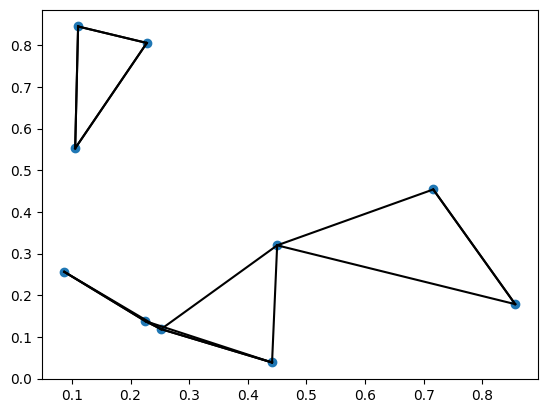

In [27]:
plt.scatter(X[:, 0], X[:, 1])
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')